# Applied Machine Learning Homework 4

## Predicting wine quality from review texts and other properties of the wine
### https://www.kaggle.com/zynicide/wine-reviews

Due: Wed 04/22/20 1pm

Alberto Munguia Cisneros

UNI: am5334

## Task 2 Word Vectors

**Important Note: This note book cannot run independently, because some of the inputs came from the procedures in Task 1**

### Model fit with Word2vec

In [79]:
import spacy

In [80]:
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner"])

In [81]:
docs_train = [nlp(d).vector for d in X_train_s.txt[:]]
docs_test = [nlp(d).vector for d in X_test_s.txt[:]]

In [82]:
X_train_spacy = np.vstack(docs_train)
X_test_spacy = np.vstack(docs_test)

In [83]:
ridge = Ridge()

res = cross_validate(ridge,X_train_spacy, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'], return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.048869,0.001995,0.594263,-3.982696,-1.602234,0.594526
1,0.030616,0.000000,0.566083,-4.101812,-1.589008,0.572427
2,0.031254,0.000000,0.539652,-4.275713,-1.623702,0.540677
3,0.031234,0.000000,0.591914,-3.626114,-1.496024,0.592772
4,0.031238,0.000000,0.582948,-4.097269,-1.619264,0.583235


In [84]:
ridge.fit(X_train_spacy, y_train)
test_score = ridge.score(X_test_spacy , y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.57497
R^2 in the Test set : 0.59656


- **Grid-Search with Word2Vec**

In [85]:
ridge = Ridge(max_iter=5000)

ridge_param_grid = {'alpha': np.logspace(-4, 5, 20) }
ridge_gcv = GridSearchCV(ridge, param_grid = ridge_param_grid ,cv=ss, return_train_score=True)
ridge_gcv.fit(X_train_spacy, y_train)
print('Ridge best parameters: {}'.format(ridge_gcv.best_params_))
print('Ridge best R^2: {:.5f}'.format(ridge_gcv.best_score_))

Ridge best parameters: {'alpha': 0.615848211066026}
Ridge best R^2: 0.57479


In [86]:
test_accuray_ridge = ridge_gcv.best_estimator_.score(X_test_spacy , y_test)
print('R^2 in the Test set : {:.5f}'.format(test_accuray_ridge))

R^2 in the Test set : 0.59725


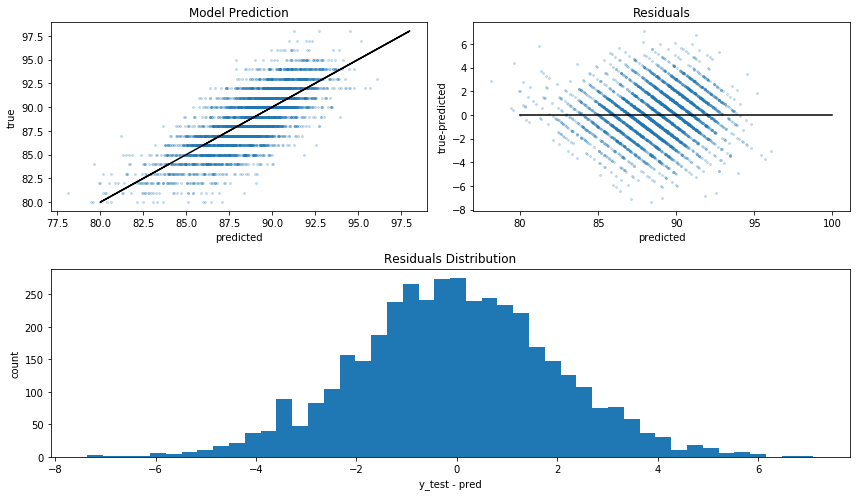

In [87]:
pred = ridge_gcv.best_estimator_.predict(X_test_spacy)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([80, 100], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

### Model fit Word2vec + BOW

In [88]:
df_X_train_spacy = pd.DataFrame(data= X_train_spacy, index=X_train_s.index).add_prefix('SCY_')
df_X_test_spacy = pd.DataFrame(data= X_test_spacy, index=X_test_s.index).add_prefix('SCY_')

In [89]:
X_train_spa_bow_cont = X_train_s.join(df_X_train_spacy)
X_test_spa_bow_cont = X_test_s.join(df_X_test_spacy)

In [90]:
X_train_spa_bow = X_train_spa_bow_cont.drop(columns=['price', 'taster_name', 'variety', 'winery', 'region_1', 'region_2','designation',])
X_test_spa_bow = X_test_spa_bow_cont.drop(columns=['price', 'taster_name', 'variety', 'winery', 'region_1', 'region_2','designation',])

In [91]:
cont_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_low_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Miss')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

cat_high_transformer = Pipeline(steps=[
    ('targetenc', TargetEncoder()),
    ('imputer', SimpleImputer(strategy='median'))])

txt_transformer = Pipeline(steps=[
    ('countvec', CountVectorizer(ngram_range=(1, 1), min_df=1, stop_words="english"))])

preprocessor = ColumnTransformer(
    transformers=[('txt_tra', txt_transformer, 'txt')
    ], remainder = 'passthrough')

In [92]:
ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regression', Ridge())])

res = cross_validate(ridge, X_train_spa_bow, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'], return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,2.891748,0.078102,0.628769,-3.450151,-1.458086,0.629225
1,2.858702,0.078106,0.672612,-3.101988,-1.368652,0.673043
2,2.870157,0.078107,0.637738,-3.238288,-1.400864,0.637870
3,2.858700,0.078106,0.646126,-3.488782,-1.457337,0.646362
4,3.233613,0.093729,0.614462,-3.664496,-1.482731,0.614793


In [93]:
ridge.fit(X_train_spa_bow, y_train)
test_score = ridge.score(X_test_spa_bow , y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.63994
R^2 in the Test set : 0.66140


- **Grid-Search with Word2Vec + BOW**

In [94]:
ridge_pipeline = make_pipeline(preprocessor, Ridge(max_iter=5000))
ridge_param_grid = {'ridge__alpha': np.logspace(-4, 5, 20)}
ridge_gcv = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=ss, return_train_score=True)
ridge_gcv.fit(X_train_spa_bow, y_train)
print('Ridge best parameters: {}'.format(ridge_gcv.best_params_))
print('Ridge best R^2: {:.5f}'.format(ridge_gcv.best_score_))

Ridge best parameters: {'ridge__alpha': 16.23776739188721}
Ridge best R^2: 0.71933


In [95]:
test_accuray_ridge = ridge_gcv.best_estimator_.score(X_test_spa_bow , y_test)
print('R^2 in the Test set : {:.5f}'.format(test_accuray_ridge))

R^2 in the Test set : 0.74086


### Model fit Word2vec + BOW + Continous

In [96]:
df_X_train_spacy = pd.DataFrame(data= X_train_spacy, index=X_train_s.index).add_prefix('SCY_')
df_X_test_spacy = pd.DataFrame(data= X_test_spacy, index=X_test_s.index).add_prefix('SCY_')

In [97]:
X_train_spa_bow_cont = X_train_s.join(df_X_train_spacy)
X_test_spa_bow_cont = X_test_s.join(df_X_test_spacy)

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cont_tra', cont_transformer, ['price']),
        ('cat_low_tra', cat_low_transformer, ['taster_name', 'region_2']),
        ('cat_high_tra', cat_high_transformer, ['variety', 'winery', 'region_1', 'designation']),
        ('txt_tra', txt_transformer, 'txt')
    ], remainder = 'passthrough')

In [99]:
ridge = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regression', Ridge())])

res = cross_validate(ridge, X_train_spa_bow_cont, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'], return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,3.892775,0.093728,0.668978,-3.232429,-1.400861,0.669285
1,3.655393,0.109348,0.661675,-3.140857,-1.364439,0.662005
2,3.686312,0.078107,0.652140,-3.358013,-1.416997,0.652141
3,3.794593,0.093727,0.662491,-3.279790,-1.404558,0.662495
4,3.827782,0.109348,0.658826,-3.140059,-1.361165,0.658943


In [100]:
ridge.fit(X_train_spa_bow_cont, y_train)
test_score = ridge.score(X_test_spa_bow_cont , y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.66082
R^2 in the Test set : 0.69361


- **Grid-Search with Word2Vec + BOW + continous**

In [101]:
ridge_pipeline = make_pipeline(preprocessor, Ridge(max_iter=5000))
ridge_param_grid = {'ridge__alpha': np.logspace(-4, 5, 20)}
ridge_gcv = GridSearchCV(ridge_pipeline, param_grid=ridge_param_grid, cv=ss, return_train_score=True)
ridge_gcv.fit(X_train_spa_bow_cont, y_train)
print('Ridge best parameters: {}'.format(ridge_gcv.best_params_))
print('Ridge best R^2: {:.5f}'.format(ridge_gcv.best_score_))

Ridge best parameters: {'ridge__alpha': 16.23776739188721}
Ridge best R^2: 0.73681


In [102]:
test_accuray_ridge = ridge_gcv.best_estimator_.score(X_test_spa_bow_cont , y_test)
print('R^2 in the Test set : {:.5f}'.format(test_accuray_ridge))

R^2 in the Test set : 0.75779


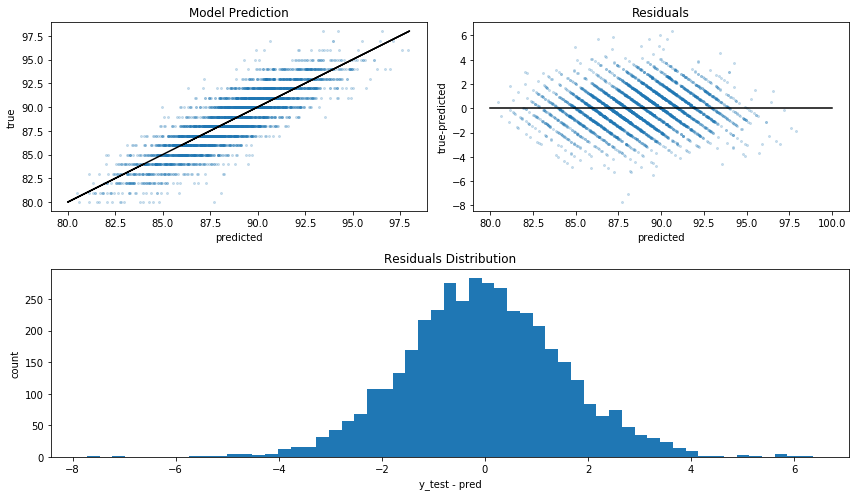

In [104]:
pred = ridge_gcv.best_estimator_.predict(X_test_spa_bow_cont)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([80, 100], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

**From the reuslts of this second task we can conclude that:**
- **Word2Vec methodology by itself is not better than BOW plain vanilla or the Tunned version of BOW that we presented in Task 1.**

- **The combination of Word2Vec and BOW gives us a similar $R^2$ than the combined model BOW + Non-text features, so we can say that some how the context provided from the Word2Vec methodology is responsable of that gain in the $R^2$.**

- **Finally, we can observe that a combinated model Word2Vec + BOW + Non-text features, gives us the best $R^2$ of all estimation procedures.**